In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('bol.csv', sep=';', encoding='latin-1')

In [3]:
df2 = pd.read_csv('env.csv', sep=';', encoding='latin-1')

In [4]:
df3 = pd.read_csv('veic.csv', sep=';', encoding='latin-1')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11122 entries, 0 to 11121
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NUMERO_BOLETIM        11122 non-null  object 
 1   DATAHORA_BOLETIM      11122 non-null  object 
 2   DATA_INCLUSAO         11122 non-null  object 
 3   TIPO_ACIDENTE         11122 non-null  object 
 4   DESC_TIPO_ACIDENTE    11122 non-null  object 
 5   COD_TEMPO             11122 non-null  int64  
 6   DESC_TEMPO            11122 non-null  object 
 7   COD_PAVIMENTO         11122 non-null  int64  
 8   PAVIMENTO             11122 non-null  object 
 9   COD_REGIONAL          11122 non-null  int64  
 10  DESC_REGIONAL         10507 non-null  object 
 11  ORIGEM_BOLETIM        11122 non-null  object 
 12  LOCAL_SINALIZADO      11122 non-null  object 
 13  VELOCIDADE_PERMITIDA  11122 non-null  int64  
 14  COORDENADA_X          11122 non-null  float64
 15  COORDENADA_Y       

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23736 entries, 0 to 23735
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Nº_boletim             23736 non-null  object
 1   data_hora_boletim      23736 non-null  object
 2   Nº_envolvido           23736 non-null  int64 
 3   condutor               23736 non-null  object
 4   cod_severidade         23736 non-null  int64 
 5   desc_severidade        23736 non-null  object
 6   sexo                   23736 non-null  object
 7   cinto_seguranca        23736 non-null  object
 8   Embreagues             23736 non-null  object
 9   Idade                  23736 non-null  int64 
 10  nascimento             23736 non-null  object
 11  categoria_habilitacao  19722 non-null  object
 12  descricao_habilitacao  20144 non-null  object
 13  declaracao_obito       23736 non-null  int64 
 14  cod_severidade_antiga  23736 non-null  int64 
 15  especie_veiculo    

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20506 entries, 0 to 20505
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nº_boletim           20506 non-null  object
 1   data_hora_boletim    20506 non-null  object
 2   seq_veic             20506 non-null  int64 
 3   cod_categ            20506 non-null  int64 
 4   descricao_categoria  20506 non-null  object
 5   cod_especie          20506 non-null  int64 
 6   descricao_especie    20506 non-null  object
 7   cod_situacao         20506 non-null  int64 
 8   desc_situacao        20506 non-null  object
 9   tipo_socorro         20506 non-null  int64 
 10  desc_tipo_socorro    20506 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.7+ MB


In [8]:
## removendo colunas não desejáveis dos 3 arquivos

In [9]:
df1

,NUMERO_BOLETIM,DATAHORA_BOLETIM,DATA_INCLUSAO,TIPO_ACIDENTE,DESC_TIPO_ACIDENTE,COD_TEMPO,DESC_TEMPO,COD_PAVIMENTO,PAVIMENTO,COD_REGIONAL,...,VELOCIDADE_PERMITIDA,COORDENADA_X,COORDENADA_Y,HORA_INFORMADA,INDICADOR_FATALIDADE,VALOR_UPS,DESCRIÇÃO_UPS,DATA_ALTERACAO_SMSA,VALOR_UPS_ANTIGA,DESCRIÇÃO_UPS_ANTIGA
0,2021-008886628-002,20/02/202110:01,20/02/202111:10,H01002,ABALROAMENTOCOMVITIMA,1,BOM,1,ASFALTO,21,...,60,605027.20,7797323.03,SIM,NÃO,0,NÃOINFORMADO,00/00/0000,0,NÃOINFORMADO
1,2021-008888878-001,20/02/202110:25,20/02/202111:30,H09002,COLISAODEVEICULOSCOMVITIMA,1,BOM,1,ASFALTO,24,...,0,605929.12,7790628.88,SIM,NÃO,0,NÃOINFORMADO,00/00/0000,0,NÃOINFORMADO
2,2021-008891464-001,20/02/202111:22,20/02/202111:55,H04000,QUEDADEPESSOADEVEICULO,1,BOM,1,ASFALTO,21,...,0,611725.63,7798841.07,SIM,NÃO,0,NÃOINFORMADO,00/00/0000,0,NÃOINFORMADO
3,2021-008891884-001,19/02/202123:00,20/02/202111:59,H08002,CHOQUEMECANICOCOMVITIMA,0,NAOINFORMADO,0,NAOINFORMADO,24,...,0,608151.70,7793146.59,SIM,NÃO,0,NÃOINFORMADO,00/00/0000,0,NÃOINFORMADO
4,2021-008892064-001,20/02/202111:22,20/02/202112:02,H01002,ABALROAMENTOCOMVITIMA,1,BOM,1,ASFALTO,25,...,0,608474.90,7807131.57,SIM,NÃO,0,NÃOINFORMADO,00/00/0000,0,NÃOINFORMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11117,2021-037689704-001,06/08/202111:24,06/08/202111:55,H01002,ABALROAMENTOCOMVITIMA,1,BOM,1,ASFALTO,25,...,0,604427.71,7802440.93,SIM,NÃO,0,NÃOINFORMADO,00/00/0000,0,NÃOINFORMADO
11118,2021-037690480-002,06/08/202111:19,17/08/202109:55,H01002,ABALROAMENTOCOMVITIMA,0,NAOINFORMADO,0,NAOINFORMADO,19,...,0,610996.31,7795696.26,SIM,NÃO,0,NÃOINFORMADO,00/00/0000,0,NÃOINFORMADO
11119,2021-037691183-001,05/08/202120:40,06/08/202112:06,H01002,ABALROAMENTOCOMVITIMA,0,NAOINFORMADO,0,NAOINFORMADO,21,...,0,613372.24,7804486.77,SIM,NÃO,0,NÃOINFORMADO,00/00/0000,0,NÃOINFORMADO
11120,2021-037693232-002,06/08/202110:23,06/08/202114:02,H06002,ATROPELAMENTODEPESSOASEMVITIMAFATAL,0,NAOINFORMADO,0,NAOINFORMADO,20,...,0,613139.83,7797943.32,SIM,NÃO,0,NÃOINFORMADO,00/00/0000,0,NÃOINFORMADO


In [10]:
df1.columns

Index(['NUMERO_BOLETIM', 'DATAHORA_BOLETIM', 'DATA_INCLUSAO', 'TIPO_ACIDENTE',
       'DESC_TIPO_ACIDENTE', 'COD_TEMPO', 'DESC_TEMPO', 'COD_PAVIMENTO',
       'PAVIMENTO', 'COD_REGIONAL', 'DESC_REGIONAL', 'ORIGEM_BOLETIM',
       'LOCAL_SINALIZADO', 'VELOCIDADE_PERMITIDA', 'COORDENADA_X',
       'COORDENADA_Y', 'HORA_INFORMADA', 'INDICADOR_FATALIDADE', 'VALOR_UPS',
       'DESCRIÇÃO_UPS', 'DATA_ALTERACAO_SMSA', 'VALOR_UPS_ANTIGA',
       'DESCRIÇÃO_UPS_ANTIGA'],
      dtype='object')

In [11]:
df1 = df1.drop(columns=['DATA_INCLUSAO', 'TIPO_ACIDENTE', 'COD_TEMPO','COD_PAVIMENTO', 'COD_REGIONAL', 'DESC_REGIONAL', 'ORIGEM_BOLETIM',
       'LOCAL_SINALIZADO', 'VELOCIDADE_PERMITIDA','HORA_INFORMADA', 'INDICADOR_FATALIDADE', 'VALOR_UPS',
       'DESCRIÇÃO_UPS', 'DATA_ALTERACAO_SMSA', 'VALOR_UPS_ANTIGA',
       'DESCRIÇÃO_UPS_ANTIGA'])

In [12]:
df1

,NUMERO_BOLETIM,DATAHORA_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y
0,2021-008886628-002,20/02/202110:01,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,605027.20,7797323.03
1,2021-008888878-001,20/02/202110:25,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,605929.12,7790628.88
2,2021-008891464-001,20/02/202111:22,QUEDADEPESSOADEVEICULO,BOM,ASFALTO,611725.63,7798841.07
3,2021-008891884-001,19/02/202123:00,CHOQUEMECANICOCOMVITIMA,NAOINFORMADO,NAOINFORMADO,608151.70,7793146.59
4,2021-008892064-001,20/02/202111:22,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,608474.90,7807131.57
...,...,...,...,...,...,...,...
11117,2021-037689704-001,06/08/202111:24,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,604427.71,7802440.93
11118,2021-037690480-002,06/08/202111:19,ABALROAMENTOCOMVITIMA,NAOINFORMADO,NAOINFORMADO,610996.31,7795696.26
11119,2021-037691183-001,05/08/202120:40,ABALROAMENTOCOMVITIMA,NAOINFORMADO,NAOINFORMADO,613372.24,7804486.77
11120,2021-037693232-002,06/08/202110:23,ATROPELAMENTODEPESSOASEMVITIMAFATAL,NAOINFORMADO,NAOINFORMADO,613139.83,7797943.32


In [13]:
df1.isna().sum()

NUMERO_BOLETIM        0
DATAHORA_BOLETIM      0
DESC_TIPO_ACIDENTE    0
DESC_TEMPO            0
PAVIMENTO             0
COORDENADA_X          0
COORDENADA_Y          0
dtype: int64

In [14]:
df1.DESC_TEMPO.value_counts()
### 5949 NAO INFORMADO > excluir instâncias

NAOINFORMADO    5949
BOM             4444
CHUVA            497
NUBLADO          228
NEBLINA            4
Name: DESC_TEMPO, dtype: int64

In [15]:
df1.PAVIMENTO.value_counts()

NAOINFORMADO    5905
ASFALTO         5163
CALCAMENTO        28
CONCRETO          24
TERRA              2
Name: PAVIMENTO, dtype: int64

In [16]:
df1 = df1[df1['DESC_TEMPO'] != 'NAOINFORMADO']
df1 = df1[df1['PAVIMENTO'] != 'NAOINFORMADO']

In [17]:
df1.head(10)
## Restaram 5146 instâncias após remover os dados faltantes (por enquanto)

,NUMERO_BOLETIM,DATAHORA_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y
0,2021-008886628-002,20/02/202110:01,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,605027.20,7797323.03
1,2021-008888878-001,20/02/202110:25,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,605929.12,7790628.88
2,2021-008891464-001,20/02/202111:22,QUEDADEPESSOADEVEICULO,BOM,ASFALTO,611725.63,7798841.07
4,2021-008892064-001,20/02/202111:22,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,608474.90,7807131.57
5,2021-008893316-001,20/02/202111:50,ATROPELAMENTODEPESSOACOMVITIMAFATAL,BOM,ASFALTO,605859.45,7798641.15
6,2021-008894925-001,20/02/202111:52,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,613131.36,7805477.77
7,2021-008896805-001,20/02/202112:31,CHOQUEMECANICOCOMVITIMA,BOM,ASFALTO,607454.23,7806645.60
8,2021-008902087-001,20/02/202112:16,COLISAODEVEICULOSCOMVITIMA,NUBLADO,ASFALTO,610660.50,7807364.07
9,2021-008902152-001,20/02/202113:21,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,612212.06,7802031.84
15,2021-008965512-001,20/02/202119:48,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,611458.68,7797003.62


In [18]:
df2.columns

Index(['Nº_boletim', 'data_hora_boletim', 'Nº_envolvido', 'condutor',
       'cod_severidade', 'desc_severidade', 'sexo', 'cinto_seguranca',
       'Embreagues', 'Idade', 'nascimento', 'categoria_habilitacao',
       'descricao_habilitacao', 'declaracao_obito', 'cod_severidade_antiga',
       'especie_veiculo', 'pedestre', 'passageiro'],
      dtype='object')

In [19]:
df2 = df2.drop(columns=['data_hora_boletim', 'cod_severidade', 'nascimento', 'descricao_habilitacao', 'declaracao_obito', 'cod_severidade_antiga', 'especie_veiculo'])

In [20]:
df2

,Nº_boletim,Nº_envolvido,condutor,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,categoria_habilitacao,pedestre,passageiro
0,2021-014038208-001,1,S,SEMFERIMENTOS,M,SIM,NÃO,37,AB,N,N
1,2021-014038208-001,2,S,NAOFATAL,M,SIM,NÃO,37,AB,N,N
2,2021-014050858-001,1,S,NAOFATAL,M,SIM,NÃO,30,NaN,N,N
3,2021-014050858-001,2,N,NAOFATAL,M,SIM,NÃO,27,NaN,N,S
4,2021-014050858-001,6,S,SEMFERIMENTOS,M,NÃO,NÃOINFORMADO,0,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23731,2021-052396384-001,2,S,NAOINFORMADO,0,NÃO,NÃOINFORMADO,0,N,NaN,NaN
23732,2021-052400839-001,1,S,SEMFERIMENTOS,M,SIM,NÃO,69,AB,N,N
23733,2021-052400839-001,2,S,NAOFATAL,M,SIM,NÃO,22,AB,N,N
23734,2021-052400960-001,1,S,NAOFATAL,M,SIM,NÃO,62,AB,N,N


In [21]:
# Imputação de dados faltantes pela proporção de M e F na coluna 'sexo'

In [22]:
df2.sexo.value_counts()

M    17684
F     5280
0      772
Name: sexo, dtype: int64

In [23]:
df2.replace('0', np.nan, inplace=True)

In [24]:
df2.replace('NÃOINFORMADO', np.nan, inplace=True)

In [25]:
df2['sexo'] = df2['sexo'].fillna(pd.Series(np.random.choice(['M', 'F'], 
                                                      p=[0.75,0.25], size=len(df2))))

In [26]:
df2.sexo.value_counts()

M    18266
F     5470
Name: sexo, dtype: int64

In [27]:
df2

,Nº_boletim,Nº_envolvido,condutor,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,categoria_habilitacao,pedestre,passageiro
0,2021-014038208-001,1,S,SEMFERIMENTOS,M,SIM,NÃO,37,AB,N,N
1,2021-014038208-001,2,S,NAOFATAL,M,SIM,NÃO,37,AB,N,N
2,2021-014050858-001,1,S,NAOFATAL,M,SIM,NÃO,30,NaN,N,N
3,2021-014050858-001,2,N,NAOFATAL,M,SIM,NÃO,27,NaN,N,S
4,2021-014050858-001,6,S,SEMFERIMENTOS,M,NÃO,NaN,0,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23731,2021-052396384-001,2,S,NAOINFORMADO,M,NÃO,NaN,0,N,NaN,NaN
23732,2021-052400839-001,1,S,SEMFERIMENTOS,M,SIM,NÃO,69,AB,N,N
23733,2021-052400839-001,2,S,NAOFATAL,M,SIM,NÃO,22,AB,N,N
23734,2021-052400960-001,1,S,NAOFATAL,M,SIM,NÃO,62,AB,N,N


In [28]:
df3.columns

Index(['Nº_boletim', 'data_hora_boletim', 'seq_veic', 'cod_categ',
       'descricao_categoria', 'cod_especie', 'descricao_especie',
       'cod_situacao', 'desc_situacao', 'tipo_socorro', 'desc_tipo_socorro'],
      dtype='object')

In [29]:
df3 = df3.drop(columns=['data_hora_boletim','cod_categ', 'cod_especie', 'cod_situacao', 'tipo_socorro', 'desc_tipo_socorro'])

In [30]:
df3

,Nº_boletim,seq_veic,descricao_categoria,descricao_especie,desc_situacao
0,2021-014038208-001,1,PARTICULAR,AUTOMOVEL,EMMOVIMENTO
1,2021-014038208-001,2,PARTICULAR,MOTOCICLETA,EMMOVIMENTO
2,2021-014050858-001,1,PARTICULAR,CARROCA,EMMOVIMENTO
3,2021-014050858-001,2,PARTICULAR,AUTOMOVEL,EMMOVIMENTO
4,2021-014056225-001,2,PARTICULAR,AUTOMOVEL,EMMOVIMENTO
...,...,...,...,...,...
20501,2021-021332901-001,3,PARTICULAR,AUTOMOVEL,ESTACIONADO
20502,2021-052672839-001,1,PARTICULAR,AUTOMOVEL,ESTACIONADO
20503,2021-057027992-001,2,PARTICULAR,AUTOMOVEL,ESTACIONADO
20504,2021-013952032-001,1,PARTICULAR,AUTOMOVEL,ESTACIONADO


In [31]:
## Criando novas colunas no df1
## Fazer onehotencoding para tipos de veículos e somar os boletins 

In [32]:
df3.descricao_especie.value_counts()

AUTOMOVEL               9781
MOTOCICLETA             8530
ONIBUS                   535
BICICLETA                424
CAMINHONETE              401
CAMINHAO                 363
CAMIONETA                110
NAOINFORMADO              72
REBOQUEESEMI-REBOQUE      70
MOTONETA                  68
CAMINHAO-TRATOR           55
MICROONIBUS               37
CICLOMOTOR                23
CARROCA                    9
CARRODEMAO                 8
KOMBI                      7
TRICICLO                   4
TRATORDERODAS              3
PATINETE                   3
ESPECIAL                   2
TRACAO                     1
Name: descricao_especie, dtype: int64

In [33]:
df3 = df3[df3['descricao_especie'] != 'NAOINFORMADO']
## Removidas instancias sem informação sobre o tipo do veículo

In [34]:
dfx = df3.drop(columns=['seq_veic', 'descricao_categoria', 'desc_situacao'])

In [35]:
dfx

,Nº_boletim,descricao_especie
0,2021-014038208-001,AUTOMOVEL
1,2021-014038208-001,MOTOCICLETA
2,2021-014050858-001,CARROCA
3,2021-014050858-001,AUTOMOVEL
4,2021-014056225-001,AUTOMOVEL
...,...,...
20501,2021-021332901-001,AUTOMOVEL
20502,2021-052672839-001,AUTOMOVEL
20503,2021-057027992-001,AUTOMOVEL
20504,2021-013952032-001,AUTOMOVEL


In [36]:
## Binarizando as categorias de veículos

In [37]:
ohe = OneHotEncoder()

In [38]:
array1 = ohe.fit_transform(dfx[['descricao_especie']]).toarray()

In [39]:
dfxcol = ohe.categories_

In [40]:
dfxcol

[array(['AUTOMOVEL', 'BICICLETA', 'CAMINHAO', 'CAMINHAO-TRATOR',
        'CAMINHONETE', 'CAMIONETA', 'CARROCA', 'CARRODEMAO', 'CICLOMOTOR',
        'ESPECIAL', 'KOMBI', 'MICROONIBUS', 'MOTOCICLETA', 'MOTONETA',
        'ONIBUS', 'PATINETE', 'REBOQUEESEMI-REBOQUE', 'TRACAO',
        'TRATORDERODAS', 'TRICICLO'], dtype=object)]

In [41]:
dfx2 = pd.DataFrame(array1, columns=dfxcol)

In [42]:
dfx2

,AUTOMOVEL,BICICLETA,CAMINHAO,CAMINHAO-TRATOR,CAMINHONETE,CAMIONETA,CARROCA,CARRODEMAO,CICLOMOTOR,ESPECIAL,KOMBI,MICROONIBUS,MOTOCICLETA,MOTONETA,ONIBUS,PATINETE,REBOQUEESEMI-REBOQUE,TRACAO,TRATORDERODAS,TRICICLO
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20430,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20431,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
dfx = dfx.reset_index()

In [44]:
dfx

,index,Nº_boletim,descricao_especie
0,0,2021-014038208-001,AUTOMOVEL
1,1,2021-014038208-001,MOTOCICLETA
2,2,2021-014050858-001,CARROCA
3,3,2021-014050858-001,AUTOMOVEL
4,4,2021-014056225-001,AUTOMOVEL
...,...,...,...
20429,20501,2021-021332901-001,AUTOMOVEL
20430,20502,2021-052672839-001,AUTOMOVEL
20431,20503,2021-057027992-001,AUTOMOVEL
20432,20504,2021-013952032-001,AUTOMOVEL


In [45]:
fx = pd.concat([dfx, dfx2], axis=1)

In [46]:
fx = fx.drop(columns=['index'])

In [47]:
fx = fx.drop(columns=['descricao_especie'])

In [48]:
fx

,Nº_boletim,"(AUTOMOVEL,)","(BICICLETA,)","(CAMINHAO,)","(CAMINHAO-TRATOR,)","(CAMINHONETE,)","(CAMIONETA,)","(CARROCA,)","(CARRODEMAO,)","(CICLOMOTOR,)",...,"(KOMBI,)","(MICROONIBUS,)","(MOTOCICLETA,)","(MOTONETA,)","(ONIBUS,)","(PATINETE,)","(REBOQUEESEMI-REBOQUE,)","(TRACAO,)","(TRATORDERODAS,)","(TRICICLO,)"
0,2021-014038208-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-014038208-001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-014050858-001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-014050858-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-014056225-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20429,2021-021332901-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20430,2021-052672839-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20431,2021-057027992-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20432,2021-013952032-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
fx = fx.groupby('Nº_boletim').sum()

In [50]:
fx = fx.reset_index(level=0)

In [51]:
fx

,Nº_boletim,"(AUTOMOVEL,)","(BICICLETA,)","(CAMINHAO,)","(CAMINHAO-TRATOR,)","(CAMINHONETE,)","(CAMIONETA,)","(CARROCA,)","(CARRODEMAO,)","(CICLOMOTOR,)",...,"(KOMBI,)","(MICROONIBUS,)","(MOTOCICLETA,)","(MOTONETA,)","(ONIBUS,)","(PATINETE,)","(REBOQUEESEMI-REBOQUE,)","(TRACAO,)","(TRATORDERODAS,)","(TRICICLO,)"
0,2021-000003738-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-000007763-001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-000013248-002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-000014597-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-000022433-001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11103,2022-012156151-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11104,2022-013144981-001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11105,2022-013358270-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11106,2022-013454566-001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
fx.columns

Index([             'Nº_boletim',            ('AUTOMOVEL',),
                  ('BICICLETA',),             ('CAMINHAO',),
            ('CAMINHAO-TRATOR',),          ('CAMINHONETE',),
                  ('CAMIONETA',),              ('CARROCA',),
                 ('CARRODEMAO',),           ('CICLOMOTOR',),
                   ('ESPECIAL',),                ('KOMBI',),
                ('MICROONIBUS',),          ('MOTOCICLETA',),
                   ('MOTONETA',),               ('ONIBUS',),
                   ('PATINETE',), ('REBOQUEESEMI-REBOQUE',),
                     ('TRACAO',),        ('TRATORDERODAS',),
                   ('TRICICLO',)],
      dtype='object')

In [53]:
fx.columns=['NUMERO_BOLETIM','AUTOMOVEL', 'BICICLETA', 'CAMINHAO', 'CAMINHAO-TRATOR', 'CAMINHONETE', 'CAMIONETA', 'CARROCA', 'CARRODEMAO', 'CICLOMOTOR', 'ESPECIAL', 'KOMBI', 'MICROONIBUS', 'MOTOCICLETA', 'MOTONETA', 'ONIBUS', 'PATINETE', 'REBOQUEESEMI-REBOQUE', 'TRACAO', 'TRATORDERODAS', 'TRICICLO']

In [54]:
fx

,NUMERO_BOLETIM,AUTOMOVEL,BICICLETA,CAMINHAO,CAMINHAO-TRATOR,CAMINHONETE,CAMIONETA,CARROCA,CARRODEMAO,CICLOMOTOR,...,KOMBI,MICROONIBUS,MOTOCICLETA,MOTONETA,ONIBUS,PATINETE,REBOQUEESEMI-REBOQUE,TRACAO,TRATORDERODAS,TRICICLO
0,2021-000003738-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-000007763-001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-000013248-002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-000014597-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-000022433-001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11103,2022-012156151-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11104,2022-013144981-001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11105,2022-013358270-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11106,2022-013454566-001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# processando a data dos acidentes
from datetime import datetime

In [56]:
df1

,NUMERO_BOLETIM,DATAHORA_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y
0,2021-008886628-002,20/02/202110:01,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,605027.20,7797323.03
1,2021-008888878-001,20/02/202110:25,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,605929.12,7790628.88
2,2021-008891464-001,20/02/202111:22,QUEDADEPESSOADEVEICULO,BOM,ASFALTO,611725.63,7798841.07
4,2021-008892064-001,20/02/202111:22,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,608474.90,7807131.57
5,2021-008893316-001,20/02/202111:50,ATROPELAMENTODEPESSOACOMVITIMAFATAL,BOM,ASFALTO,605859.45,7798641.15
...,...,...,...,...,...,...,...
11113,2021-037670749-001,06/08/202109:03,CHOQUEMECANICOCOMVITIMA,BOM,ASFALTO,607739.53,7807059.54
11115,2021-037677192-001,06/08/202110:25,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,608550.21,7789129.68
11116,2021-037680049-001,06/08/202109:27,ATROPELAMENTODEPESSOACOMVITIMAFATAL,BOM,ASFALTO,602616.53,7790788.47
11117,2021-037689704-001,06/08/202111:24,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,604427.71,7802440.93


In [57]:
df1['HORA'] = df1['DATAHORA_BOLETIM']

In [58]:
for i in range(0,5146):
    df1['HORA'].iloc[i] = int(df1['HORA'].iloc[i][10:12])
    df1['DATAHORA_BOLETIM'].iloc[i] = df1['DATAHORA_BOLETIM'].iloc[i][:10]

In [59]:
df1 = df1.reset_index()

In [60]:
df1 = df1.drop(columns=['index'])

In [61]:
#cuthora = [3, 6, 9, 12, 15, 18, 21, 24]
#labels = [1, 2, 3, 4, 5, 6, 7]

In [62]:
#classehora = pd.cut(x=df1.HORA, bins=cuthora, labels=labels)

In [63]:
#classehora = pd.DataFrame(classehora)

In [64]:
#classehora.isna().sum()

In [65]:
#df1['HORA'] = classehora['HORA']

In [66]:
df1['DATAHORA_BOLETIM'] = pd.to_datetime(df1['DATAHORA_BOLETIM'])

In [67]:
df1['ano']= df1['DATAHORA_BOLETIM'].dt.year
df1['mes']= df1['DATAHORA_BOLETIM'].dt.month
df1['dia']= df1['DATAHORA_BOLETIM'].dt.day
df1['d_sem'] = df1['DATAHORA_BOLETIM'].dt.dayofweek

In [68]:
df1

,NUMERO_BOLETIM,DATAHORA_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,ano,mes,dia,d_sem
0,2021-008886628-002,2021-02-20,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,605027.20,7797323.03,10,2021,2,20,5
1,2021-008888878-001,2021-02-20,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,605929.12,7790628.88,10,2021,2,20,5
2,2021-008891464-001,2021-02-20,QUEDADEPESSOADEVEICULO,BOM,ASFALTO,611725.63,7798841.07,11,2021,2,20,5
3,2021-008892064-001,2021-02-20,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,608474.90,7807131.57,11,2021,2,20,5
4,2021-008893316-001,2021-02-20,ATROPELAMENTODEPESSOACOMVITIMAFATAL,BOM,ASFALTO,605859.45,7798641.15,11,2021,2,20,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5141,2021-037670749-001,2021-06-08,CHOQUEMECANICOCOMVITIMA,BOM,ASFALTO,607739.53,7807059.54,9,2021,6,8,1
5142,2021-037677192-001,2021-06-08,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,608550.21,7789129.68,10,2021,6,8,1
5143,2021-037680049-001,2021-06-08,ATROPELAMENTODEPESSOACOMVITIMAFATAL,BOM,ASFALTO,602616.53,7790788.47,9,2021,6,8,1
5144,2021-037689704-001,2021-06-08,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,604427.71,7802440.93,11,2021,6,8,1


In [69]:
df1 = df1.drop(columns=['DATAHORA_BOLETIM'])

In [70]:
df1

,NUMERO_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,ano,mes,dia,d_sem
0,2021-008886628-002,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,605027.20,7797323.03,10,2021,2,20,5
1,2021-008888878-001,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,605929.12,7790628.88,10,2021,2,20,5
2,2021-008891464-001,QUEDADEPESSOADEVEICULO,BOM,ASFALTO,611725.63,7798841.07,11,2021,2,20,5
3,2021-008892064-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,608474.90,7807131.57,11,2021,2,20,5
4,2021-008893316-001,ATROPELAMENTODEPESSOACOMVITIMAFATAL,BOM,ASFALTO,605859.45,7798641.15,11,2021,2,20,5
...,...,...,...,...,...,...,...,...,...,...,...
5141,2021-037670749-001,CHOQUEMECANICOCOMVITIMA,BOM,ASFALTO,607739.53,7807059.54,9,2021,6,8,1
5142,2021-037677192-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,608550.21,7789129.68,10,2021,6,8,1
5143,2021-037680049-001,ATROPELAMENTODEPESSOACOMVITIMAFATAL,BOM,ASFALTO,602616.53,7790788.47,9,2021,6,8,1
5144,2021-037689704-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,604427.71,7802440.93,11,2021,6,8,1


In [71]:
# Dropar instâncias sem coordenadas_X e Y registradas
df1.COORDENADA_X.value_counts()

0.00         465
605836.61    166
608550.21     76
605027.20     70
605835.52     47
            ... 
603805.82      1
609201.25      1
607605.92      1
609318.54      1
607137.50      1
Name: COORDENADA_X, Length: 3582, dtype: int64

In [72]:
df1 = df1[df1['COORDENADA_X'] != 0.00]

In [73]:
df1.COORDENADA_X.value_counts()

605836.61    166
608550.21     76
605027.20     70
605835.52     47
605929.12     42
            ... 
603805.82      1
609201.25      1
607605.92      1
609318.54      1
607137.50      1
Name: COORDENADA_X, Length: 3581, dtype: int64

In [74]:
df1.COORDENADA_Y.value_counts()

7798624.66    166
7789129.68     76
7797323.03     70
7798623.87     47
7790628.88     42
             ... 
7789674.04      1
7794503.43      1
7790817.30      1
7798025.90      1
7805520.89      1
Name: COORDENADA_Y, Length: 3580, dtype: int64

In [75]:
import matplotlib.pyplot as plt

In [76]:
import seaborn as sns

<AxesSubplot:xlabel='COORDENADA_X', ylabel='COORDENADA_Y'>

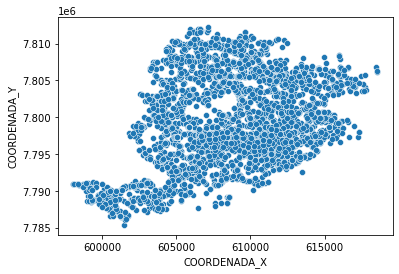

In [77]:
sns.scatterplot(data=df1, x="COORDENADA_X", y="COORDENADA_Y")

In [78]:
df2.desc_severidade.value_counts()

NAOFATAL         13062
SEMFERIMENTOS    10115
NAOINFORMADO       446
FATAL              113
Name: desc_severidade, dtype: int64

In [79]:
inner_join = pd.merge(fx, 
                      df1, 
                      on ='NUMERO_BOLETIM', 
                      how ='inner')
inner_join

,NUMERO_BOLETIM,AUTOMOVEL,BICICLETA,CAMINHAO,CAMINHAO-TRATOR,CAMINHONETE,CAMIONETA,CARROCA,CARRODEMAO,CICLOMOTOR,...,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,ano,mes,dia,d_sem
0,2021-000003738-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,609287.10,7810943.61,0,2021,1,1,4
1,2021-000013248-002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,CHOQUEMECANICOCOMVITIMA,BOM,ASFALTO,609349.47,7791909.99,0,2021,1,1,4
2,2021-000014597-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,613816.81,7805443.87,2,2021,1,1,4
3,2021-000026591-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,608550.21,7789129.68,7,2021,1,1,4
4,2021-000042616-001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,610320.57,7798789.06,10,2021,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,2021-062470995-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,COLISAODEVEICULOSCOMVITIMA,CHUVA,ASFALTO,605027.20,7797323.03,7,2021,12,31,4
4672,2021-062477432-001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,610294.94,7799833.76,9,2021,12,31,4
4673,2021-062496260-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,605835.52,7798623.87,12,2021,12,31,4
4674,2021-062498503-001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,CAPOTAMENTO/TOMBAMENTOCOMVITIMA,CHUVA,ASFALTO,608951.38,7792720.26,12,2021,12,31,4


In [80]:
#Binarização do df2 coluna 'sexo' Homens e Mulheres - definir coluna com a proporção de mulheres condutoras em cada acidente

In [81]:
df2

,Nº_boletim,Nº_envolvido,condutor,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,categoria_habilitacao,pedestre,passageiro
0,2021-014038208-001,1,S,SEMFERIMENTOS,M,SIM,NÃO,37,AB,N,N
1,2021-014038208-001,2,S,NAOFATAL,M,SIM,NÃO,37,AB,N,N
2,2021-014050858-001,1,S,NAOFATAL,M,SIM,NÃO,30,NaN,N,N
3,2021-014050858-001,2,N,NAOFATAL,M,SIM,NÃO,27,NaN,N,S
4,2021-014050858-001,6,S,SEMFERIMENTOS,M,NÃO,NaN,0,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23731,2021-052396384-001,2,S,NAOINFORMADO,M,NÃO,NaN,0,N,NaN,NaN
23732,2021-052400839-001,1,S,SEMFERIMENTOS,M,SIM,NÃO,69,AB,N,N
23733,2021-052400839-001,2,S,NAOFATAL,M,SIM,NÃO,22,AB,N,N
23734,2021-052400960-001,1,S,NAOFATAL,M,SIM,NÃO,62,AB,N,N


In [82]:
dfsexo = df2[df2['condutor'] != 'N']

In [83]:
dfsexo = dfsexo.drop(columns=['Nº_envolvido', 'desc_severidade', 'cinto_seguranca', 'Embreagues', 'Idade', 'categoria_habilitacao', 'pedestre', 'passageiro'])

In [84]:
#dfsexo.drop(columns=['condutor'])

In [85]:
ohe2 = OneHotEncoder()

In [86]:
array2 = ohe2.fit_transform(dfsexo[['sexo']]).toarray()

In [87]:
dfsexocol = ohe2.categories_

In [88]:
dfsexocol

[array(['F', 'M'], dtype=object)]

In [89]:
dfsexobin = pd.DataFrame(array2, columns=dfsexocol)

In [90]:
dfsexo

,Nº_boletim,condutor,sexo
0,2021-014038208-001,S,M
1,2021-014038208-001,S,M
2,2021-014050858-001,S,M
4,2021-014050858-001,S,M
5,2021-014056225-001,S,M
...,...,...,...
23731,2021-052396384-001,S,M
23732,2021-052400839-001,S,M
23733,2021-052400839-001,S,M
23734,2021-052400960-001,S,M


In [91]:
dfsexobin

,F,M
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
20139,0.0,1.0
20140,0.0,1.0
20141,0.0,1.0
20142,0.0,1.0


In [92]:
dfsexo = dfsexo.reset_index()

In [93]:
fx2 = pd.concat([dfsexo, dfsexobin], axis=1)

In [94]:
fx2

,index,Nº_boletim,condutor,sexo,"(F,)","(M,)"
0,0,2021-014038208-001,S,M,0.0,1.0
1,1,2021-014038208-001,S,M,0.0,1.0
2,2,2021-014050858-001,S,M,0.0,1.0
3,4,2021-014050858-001,S,M,0.0,1.0
4,5,2021-014056225-001,S,M,0.0,1.0
...,...,...,...,...,...,...
20139,23731,2021-052396384-001,S,M,0.0,1.0
20140,23732,2021-052400839-001,S,M,0.0,1.0
20141,23733,2021-052400839-001,S,M,0.0,1.0
20142,23734,2021-052400960-001,S,M,0.0,1.0


In [95]:
fx2 = fx2.drop(columns=['index'])

In [96]:
fx2

,Nº_boletim,condutor,sexo,"(F,)","(M,)"
0,2021-014038208-001,S,M,0.0,1.0
1,2021-014038208-001,S,M,0.0,1.0
2,2021-014050858-001,S,M,0.0,1.0
3,2021-014050858-001,S,M,0.0,1.0
4,2021-014056225-001,S,M,0.0,1.0
...,...,...,...,...,...
20139,2021-052396384-001,S,M,0.0,1.0
20140,2021-052400839-001,S,M,0.0,1.0
20141,2021-052400839-001,S,M,0.0,1.0
20142,2021-052400960-001,S,M,0.0,1.0


In [97]:
fx2.drop(columns=['condutor', 'sexo'])

,Nº_boletim,"(F,)","(M,)"
0,2021-014038208-001,0.0,1.0
1,2021-014038208-001,0.0,1.0
2,2021-014050858-001,0.0,1.0
3,2021-014050858-001,0.0,1.0
4,2021-014056225-001,0.0,1.0
...,...,...,...
20139,2021-052396384-001,0.0,1.0
20140,2021-052400839-001,0.0,1.0
20141,2021-052400839-001,0.0,1.0
20142,2021-052400960-001,0.0,1.0


In [98]:
fx2 = fx2.groupby('Nº_boletim').sum()

In [99]:
fx2 = fx2.reset_index(level=0)

In [100]:
fx2.columns=['NUMERO_BOLETIM', 'F_cond', 'M_cond']

In [101]:
inner_join = pd.merge(inner_join, 
                      fx2, 
                      on ='NUMERO_BOLETIM', 
                      how ='inner')
inner_join.head(10)

,NUMERO_BOLETIM,AUTOMOVEL,BICICLETA,CAMINHAO,CAMINHAO-TRATOR,CAMINHONETE,CAMIONETA,CARROCA,CARRODEMAO,CICLOMOTOR,...,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,ano,mes,dia,d_sem,F_cond,M_cond
0,2021-000003738-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,609287.10,7810943.61,0,2021,1,1,4,0.0,2.0
1,2021-000013248-002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,609349.47,7791909.99,0,2021,1,1,4,0.0,1.0
2,2021-000014597-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,613816.81,7805443.87,2,2021,1,1,4,0.0,2.0
3,2021-000026591-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,608550.21,7789129.68,7,2021,1,1,4,0.0,2.0
4,2021-000042616-001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,610320.57,7798789.06,10,2021,1,1,4,1.0,1.0
5,2021-000063273-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,608862.41,7793034.87,15,2021,1,1,4,0.0,2.0
6,2021-000079370-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,608268.85,7804897.86,17,2021,1,1,4,0.0,2.0
7,2021-000097133-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,611280.89,7806018.57,19,2021,1,1,4,0.0,1.0
8,2021-000098006-001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,609532.57,7810448.35,20,2021,1,1,4,1.0,1.0
9,2021-000115230-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,614616.54,7796470.96,22,2021,1,1,4,0.0,1.0


In [102]:
inner_join

,NUMERO_BOLETIM,AUTOMOVEL,BICICLETA,CAMINHAO,CAMINHAO-TRATOR,CAMINHONETE,CAMIONETA,CARROCA,CARRODEMAO,CICLOMOTOR,...,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,ano,mes,dia,d_sem,F_cond,M_cond
0,2021-000003738-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,609287.10,7810943.61,0,2021,1,1,4,0.0,2.0
1,2021-000013248-002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,609349.47,7791909.99,0,2021,1,1,4,0.0,1.0
2,2021-000014597-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,613816.81,7805443.87,2,2021,1,1,4,0.0,2.0
3,2021-000026591-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,608550.21,7789129.68,7,2021,1,1,4,0.0,2.0
4,2021-000042616-001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,610320.57,7798789.06,10,2021,1,1,4,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,2021-062470995-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,605027.20,7797323.03,7,2021,12,31,4,2.0,0.0
4667,2021-062477432-001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,610294.94,7799833.76,9,2021,12,31,4,0.0,2.0
4668,2021-062496260-001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,605835.52,7798623.87,12,2021,12,31,4,1.0,1.0
4669,2021-062498503-001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,ASFALTO,608951.38,7792720.26,12,2021,12,31,4,1.0,0.0


In [103]:
inner_join.columns

Index(['NUMERO_BOLETIM', 'AUTOMOVEL', 'BICICLETA', 'CAMINHAO',
       'CAMINHAO-TRATOR', 'CAMINHONETE', 'CAMIONETA', 'CARROCA', 'CARRODEMAO',
       'CICLOMOTOR', 'ESPECIAL', 'KOMBI', 'MICROONIBUS', 'MOTOCICLETA',
       'MOTONETA', 'ONIBUS', 'PATINETE', 'REBOQUEESEMI-REBOQUE', 'TRACAO',
       'TRATORDERODAS', 'TRICICLO', 'DESC_TIPO_ACIDENTE', 'DESC_TEMPO',
       'PAVIMENTO', 'COORDENADA_X', 'COORDENADA_Y', 'HORA', 'ano', 'mes',
       'dia', 'd_sem', 'F_cond', 'M_cond'],
      dtype='object')

In [104]:
inner_join['veic1'] = inner_join['AUTOMOVEL'] + inner_join['CAMINHONETE'] + inner_join['KOMBI'] + inner_join['MICROONIBUS']
inner_join['veic2'] = inner_join['CAMINHAO'] + inner_join['CAMINHAO-TRATOR'] + inner_join['CAMIONETA'] + inner_join['ONIBUS'] + inner_join['REBOQUEESEMI-REBOQUE']
inner_join['veic3'] = inner_join['MOTOCICLETA'] + inner_join['MOTONETA']
inner_join['veic4'] = inner_join['BICICLETA'] + inner_join['CICLOMOTOR'] + inner_join['PATINETE'] + inner_join['TRICICLO']
inner_join['veic5'] = inner_join['CARRODEMAO'] + inner_join['CARROCA'] + inner_join['ESPECIAL'] + inner_join['TRACAO'] + inner_join['TRATORDERODAS']

In [105]:
inner_join = inner_join.drop(columns=['AUTOMOVEL', 'BICICLETA', 'CAMINHAO',
       'CAMINHAO-TRATOR', 'CAMINHONETE', 'CAMIONETA', 'CARROCA', 'CARRODEMAO',
       'CICLOMOTOR', 'ESPECIAL', 'KOMBI', 'MICROONIBUS', 'MOTOCICLETA',
       'MOTONETA', 'ONIBUS', 'PATINETE', 'REBOQUEESEMI-REBOQUE', 'TRACAO',
       'TRATORDERODAS', 'TRICICLO', 'ano'])

In [106]:
inner_join['concat'] = inner_join['dia'].map(str) + inner_join['mes'].map(str)

In [107]:
inner_join

,NUMERO_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,mes,dia,d_sem,F_cond,M_cond,veic1,veic2,veic3,veic4,veic5,concat
0,2021-000003738-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,609287.10,7810943.61,0,1,1,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,11
1,2021-000013248-002,CHOQUEMECANICOCOMVITIMA,BOM,ASFALTO,609349.47,7791909.99,0,1,1,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,11
2,2021-000014597-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,613816.81,7805443.87,2,1,1,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,11
3,2021-000026591-001,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,608550.21,7789129.68,7,1,1,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,11
4,2021-000042616-001,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,610320.57,7798789.06,10,1,1,4,1.0,1.0,2.0,0.0,0.0,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,2021-062470995-001,COLISAODEVEICULOSCOMVITIMA,CHUVA,ASFALTO,605027.20,7797323.03,7,12,31,4,2.0,0.0,1.0,0.0,1.0,0.0,0.0,3112
4667,2021-062477432-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,610294.94,7799833.76,9,12,31,4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3112
4668,2021-062496260-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,605835.52,7798623.87,12,12,31,4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3112
4669,2021-062498503-001,CAPOTAMENTO/TOMBAMENTOCOMVITIMA,CHUVA,ASFALTO,608951.38,7792720.26,12,12,31,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3112


In [108]:
feriados = pd.read_csv('feriados.csv', sep=';', encoding='latin-1')

In [109]:
feriados['concat'] = feriados['concat'].map(str)
feriados = feriados.drop(columns=['dia', 'mês'])

In [110]:
dff = inner_join.merge(feriados, how='left', on='concat')

In [111]:
dff = dff.drop(columns=['mes', 'dia', 'concat'])

In [112]:
dff

,NUMERO_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,veic4,veic5,Comemoração,Feriado
0,2021-000003738-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,AnoNovo,FERIADO
1,2021-000013248-002,CHOQUEMECANICOCOMVITIMA,BOM,ASFALTO,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,AnoNovo,FERIADO
2,2021-000014597-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,AnoNovo,FERIADO
3,2021-000026591-001,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,AnoNovo,FERIADO
4,2021-000042616-001,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,610320.57,7798789.06,10,4,1.0,1.0,2.0,0.0,0.0,0.0,0.0,AnoNovo,FERIADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,2021-062470995-001,COLISAODEVEICULOSCOMVITIMA,CHUVA,ASFALTO,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0,NXT_FERIADO
4667,2021-062477432-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0,NXT_FERIADO
4668,2021-062496260-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,NXT_FERIADO
4669,2021-062498503-001,CAPOTAMENTO/TOMBAMENTOCOMVITIMA,CHUVA,ASFALTO,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,NXT_FERIADO


In [113]:
dff['Feriado'] = dff['Feriado'].map(str)

In [114]:
dff.Feriado.value_counts()

nan            4005
NXT_FERIADO     404
FERIADO         262
Name: Feriado, dtype: int64

In [115]:
df2.desc_severidade.value_counts()

NAOFATAL         13062
SEMFERIMENTOS    10115
NAOINFORMADO       446
FATAL              113
Name: desc_severidade, dtype: int64

In [116]:
# OBS: Dos 446 NAOINFORMADO, cerca de 320 já foram dropados anteriormente em outras variáveis,
# portanto vamos dropar todos os 446 após binarizar.

In [117]:
oheA = OneHotEncoder()
arrayA = oheA.fit_transform(df2[['desc_severidade']]).toarray()
df2Acol = oheA.categories_

In [118]:
df2Acol

[array(['FATAL', 'NAOFATAL', 'NAOINFORMADO', 'SEMFERIMENTOS'], dtype=object)]

In [119]:
df2A = pd.DataFrame(arrayA, columns=df2Acol)

In [120]:
df2A

,FATAL,NAOFATAL,NAOINFORMADO,SEMFERIMENTOS
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
23731,0.0,0.0,1.0,0.0
23732,0.0,0.0,0.0,1.0
23733,0.0,1.0,0.0,0.0
23734,0.0,1.0,0.0,0.0


In [121]:
df2sevbin = pd.concat([df2, df2A], axis=1)

In [122]:
df2sevbin.columns

Index([           'Nº_boletim',          'Nº_envolvido',
                    'condutor',       'desc_severidade',
                        'sexo',       'cinto_seguranca',
                  'Embreagues',                 'Idade',
       'categoria_habilitacao',              'pedestre',
                  'passageiro',              ('FATAL',),
                 ('NAOFATAL',),       ('NAOINFORMADO',),
            ('SEMFERIMENTOS',)],
      dtype='object')

In [123]:
df2sevbin = df2sevbin.drop(columns=[          'Nº_envolvido',
                    'condutor',       'desc_severidade',
                        'sexo',       'cinto_seguranca',
                  'Embreagues',                 'Idade',
       'categoria_habilitacao',              'pedestre',
                  'passageiro'])

In [124]:
df2sevbin.columns=['NUMERO_BOLETIM', 'MORTOS', 'FERIDOS', 'NAOINFORMADO', 'SEMFERIMENTOS']

In [125]:
df2sevbin = df2sevbin.groupby('NUMERO_BOLETIM').sum()

In [126]:
df2sevbin = df2sevbin.reset_index(level=0)

In [127]:
df2sevbin

,NUMERO_BOLETIM,MORTOS,FERIDOS,NAOINFORMADO,SEMFERIMENTOS
0,2021-000003738-001,0.0,1.0,0.0,2.0
1,2021-000007763-001,0.0,2.0,0.0,2.0
2,2021-000013248-002,1.0,2.0,0.0,0.0
3,2021-000014597-001,0.0,2.0,0.0,1.0
4,2021-000022433-001,0.0,1.0,1.0,0.0
...,...,...,...,...,...
11117,2022-012156151-001,0.0,1.0,1.0,0.0
11118,2022-013144981-001,0.0,1.0,0.0,0.0
11119,2022-013358270-001,0.0,1.0,1.0,0.0
11120,2022-013454566-001,0.0,1.0,0.0,0.0


In [128]:
df2sevbin.NAOINFORMADO.value_counts()

0.0    10686
1.0      427
2.0        8
3.0        1
Name: NAOINFORMADO, dtype: int64

In [129]:
df2sevbin = df2sevbin[df2sevbin['NAOINFORMADO'] == 0.0]

In [130]:
df2sevbin = df2sevbin.drop(columns=['NAOINFORMADO'])

In [131]:
df2sevbin

,NUMERO_BOLETIM,MORTOS,FERIDOS,SEMFERIMENTOS
0,2021-000003738-001,0.0,1.0,2.0
1,2021-000007763-001,0.0,2.0,2.0
2,2021-000013248-002,1.0,2.0,0.0
3,2021-000014597-001,0.0,2.0,1.0
5,2021-000025725-001,0.0,1.0,0.0
...,...,...,...,...
11112,2022-010253200-001,0.0,1.0,0.0
11113,2022-010492830-001,0.0,1.0,0.0
11116,2022-011723951-001,0.0,1.0,0.0
11118,2022-013144981-001,0.0,1.0,0.0


In [132]:
dff = dff.merge(df2sevbin, how='inner', on='NUMERO_BOLETIM')

In [133]:
dff

,NUMERO_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,veic4,veic5,Comemoração,Feriado,MORTOS,FERIDOS,SEMFERIMENTOS
0,2021-000003738-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,AnoNovo,FERIADO,0.0,1.0,2.0
1,2021-000013248-002,CHOQUEMECANICOCOMVITIMA,BOM,ASFALTO,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,AnoNovo,FERIADO,1.0,2.0,0.0
2,2021-000014597-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,AnoNovo,FERIADO,0.0,2.0,1.0
3,2021-000026591-001,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,AnoNovo,FERIADO,0.0,1.0,1.0
4,2021-000063273-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,608862.41,7793034.87,15,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,AnoNovo,FERIADO,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,2021-062470995-001,COLISAODEVEICULOSCOMVITIMA,CHUVA,ASFALTO,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0,NXT_FERIADO,0.0,1.0,1.0
4558,2021-062477432-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0,NXT_FERIADO,0.0,1.0,1.0
4559,2021-062496260-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,NXT_FERIADO,0.0,1.0,1.0
4560,2021-062498503-001,CAPOTAMENTO/TOMBAMENTOCOMVITIMA,CHUVA,ASFALTO,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,NXT_FERIADO,0.0,1.0,0.0


In [134]:
df2.Embreagues.isna().sum()

1694

In [135]:
# 1694 pessoas sem informação sobre embriaguez - preencher com a moda = NÃO

In [136]:
df2['Embreagues'] = df2['Embreagues'].fillna('NÃO')

In [137]:
df2.Embreagues.isna().sum()

0

In [138]:
df2.columns

Index(['Nº_boletim', 'Nº_envolvido', 'condutor', 'desc_severidade', 'sexo',
       'cinto_seguranca', 'Embreagues', 'Idade', 'categoria_habilitacao',
       'pedestre', 'passageiro'],
      dtype='object')

In [139]:
dfemb = df2.drop(columns=['Nº_envolvido', 'condutor', 'desc_severidade', 'sexo',
       'cinto_seguranca', 'Idade', 'categoria_habilitacao',
       'pedestre', 'passageiro'])

In [140]:
dfemb

,Nº_boletim,Embreagues
0,2021-014038208-001,NÃO
1,2021-014038208-001,NÃO
2,2021-014050858-001,NÃO
3,2021-014050858-001,NÃO
4,2021-014050858-001,NÃO
...,...,...
23731,2021-052396384-001,NÃO
23732,2021-052400839-001,NÃO
23733,2021-052400839-001,NÃO
23734,2021-052400960-001,NÃO


In [141]:
dfemb.replace('NÃO', 0, inplace=True)
dfemb.replace('SIM', 1, inplace=True)

In [142]:
dfemb

,Nº_boletim,Embreagues
0,2021-014038208-001,0
1,2021-014038208-001,0
2,2021-014050858-001,0
3,2021-014050858-001,0
4,2021-014050858-001,0
...,...,...
23731,2021-052396384-001,0
23732,2021-052400839-001,0
23733,2021-052400839-001,0
23734,2021-052400960-001,0


In [143]:
dfemb = dfemb.groupby('Nº_boletim').sum()

In [144]:
dfemb

,Embreagues
Nº_boletim,
2021-000003738-001,0
2021-000007763-001,0
2021-000013248-002,0
2021-000014597-001,0
2021-000022433-001,0
...,...
2022-012156151-001,0
2022-013144981-001,0
2022-013358270-001,0


In [145]:
dfemb = dfemb.reset_index(level=0)

In [146]:
dfemb.columns=['NUMERO_BOLETIM', 'Embreagues']

In [147]:
dff = pd.merge(dff, dfemb, on ='NUMERO_BOLETIM', how ='inner')

In [148]:
dff.drop(columns=['Comemoração'], inplace=True)

In [149]:
dff.Feriado.value_counts()

nan            3912
NXT_FERIADO     395
FERIADO         255
Name: Feriado, dtype: int64

In [150]:
dff.replace('nan', 'COMUM', inplace=True)

In [151]:
dff.Feriado.value_counts()

COMUM          3912
NXT_FERIADO     395
FERIADO         255
Name: Feriado, dtype: int64

In [152]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 0 to 4561
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NUMERO_BOLETIM      4562 non-null   object 
 1   DESC_TIPO_ACIDENTE  4562 non-null   object 
 2   DESC_TEMPO          4562 non-null   object 
 3   PAVIMENTO           4562 non-null   object 
 4   COORDENADA_X        4562 non-null   float64
 5   COORDENADA_Y        4562 non-null   float64
 6   HORA                4562 non-null   int64  
 7   d_sem               4562 non-null   int64  
 8   F_cond              4562 non-null   float64
 9   M_cond              4562 non-null   float64
 10  veic1               4562 non-null   float64
 11  veic2               4562 non-null   float64
 12  veic3               4562 non-null   float64
 13  veic4               4562 non-null   float64
 14  veic5               4562 non-null   float64
 15  Feriado             4562 non-null   object 
 16  MORTOS

In [153]:
dff

,NUMERO_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,veic4,veic5,Feriado,MORTOS,FERIDOS,SEMFERIMENTOS,Embreagues
0,2021-000003738-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,FERIADO,0.0,1.0,2.0,0
1,2021-000013248-002,CHOQUEMECANICOCOMVITIMA,BOM,ASFALTO,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,FERIADO,1.0,2.0,0.0,0
2,2021-000014597-001,ABALROAMENTOCOMVITIMA,BOM,ASFALTO,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,FERIADO,0.0,2.0,1.0,0
3,2021-000026591-001,COLISAODEVEICULOSCOMVITIMA,BOM,ASFALTO,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,FERIADO,0.0,1.0,1.0,1
4,2021-000063273-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,608862.41,7793034.87,15,4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,FERIADO,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,2021-062470995-001,COLISAODEVEICULOSCOMVITIMA,CHUVA,ASFALTO,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,0.0,0.0,NXT_FERIADO,0.0,1.0,1.0,0
4558,2021-062477432-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,NXT_FERIADO,0.0,1.0,1.0,0
4559,2021-062496260-001,ABALROAMENTOCOMVITIMA,CHUVA,ASFALTO,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NXT_FERIADO,0.0,1.0,1.0,0
4560,2021-062498503-001,CAPOTAMENTO/TOMBAMENTOCOMVITIMA,CHUVA,ASFALTO,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NXT_FERIADO,0.0,1.0,0.0,0


In [154]:
dffinal = dff

In [155]:
#BINARIZANDO AS VARIÁVEIS CATEGORICAS DESC_TIPO_ACIDENTE, DESC_TEMPO, PAVIMENTO, e Feriado

In [156]:
ohe = OneHotEncoder()
array = ohe.fit_transform(dff[['DESC_TIPO_ACIDENTE']]).toarray()
dfbcol1 = ohe.categories_
dfb1 = pd.DataFrame(array, columns=dfbcol1)

In [157]:
dfb1.columns=['ABALROAMENTOCOMVITIMA', 'ATROPELAMENTODEANIMALCOMVITIMA', 'ATROPELAMENTODEPESSOACOMVITIMAFATAL', 'ATROPELAMENTODEPESSOASEMVITIMAFATAL', 'CAPOTAMENTO/TOMBAMENTOCOMVITIMA', 'CHOQUEMECANICOCOMVITIMA', 'COLISAODEVEICULOSCOMVITIMA', 'OUTROSCOMVITIMA', 'QUEDADEPESSOADEVEICULO', 'QUEDADEVEICULOCOMVITIMA']

In [158]:
dffinal.DESC_TIPO_ACIDENTE.value_counts()

ABALROAMENTOCOMVITIMA                  2195
CHOQUEMECANICOCOMVITIMA                 873
COLISAODEVEICULOSCOMVITIMA              691
ATROPELAMENTODEPESSOASEMVITIMAFATAL     413
CAPOTAMENTO/TOMBAMENTOCOMVITIMA         229
QUEDADEPESSOADEVEICULO                   81
OUTROSCOMVITIMA                          34
ATROPELAMENTODEPESSOACOMVITIMAFATAL      28
ATROPELAMENTODEANIMALCOMVITIMA           12
QUEDADEVEICULOCOMVITIMA                   6
Name: DESC_TIPO_ACIDENTE, dtype: int64

In [159]:
dfb1

,ABALROAMENTOCOMVITIMA,ATROPELAMENTODEANIMALCOMVITIMA,ATROPELAMENTODEPESSOACOMVITIMAFATAL,ATROPELAMENTODEPESSOASEMVITIMAFATAL,CAPOTAMENTO/TOMBAMENTOCOMVITIMA,CHOQUEMECANICOCOMVITIMA,COLISAODEVEICULOSCOMVITIMA,OUTROSCOMVITIMA,QUEDADEPESSOADEVEICULO,QUEDADEVEICULOCOMVITIMA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4557,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4558,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4560,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [160]:
ohe = OneHotEncoder()
array = ohe.fit_transform(dff[['DESC_TEMPO']]).toarray()
dfbcol2 = ohe.categories_
dfb2 = pd.DataFrame(array, columns=dfbcol2)

In [161]:
ohe = OneHotEncoder()
array = ohe.fit_transform(dff[['PAVIMENTO']]).toarray()
dfbcol3 = ohe.categories_
dfb3 = pd.DataFrame(array, columns=dfbcol3)

In [162]:
ohe = OneHotEncoder()
array = ohe.fit_transform(dff[['Feriado']]).toarray()
dfbcol4 = ohe.categories_
dfb4 = pd.DataFrame(array, columns=dfbcol4)

In [163]:
dff = dff.drop(columns=['DESC_TIPO_ACIDENTE', 'DESC_TEMPO', 'PAVIMENTO', 'Feriado'])

In [164]:
dff = pd.concat([dff, dfb1, dfb2, dfb3, dfb4], axis=1)

In [165]:
dff.columns

Index([                     'NUMERO_BOLETIM',
                              'COORDENADA_X',
                              'COORDENADA_Y',
                                      'HORA',
                                     'd_sem',
                                    'F_cond',
                                    'M_cond',
                                     'veic1',
                                     'veic2',
                                     'veic3',
                                     'veic4',
                                     'veic5',
                                    'MORTOS',
                                   'FERIDOS',
                             'SEMFERIMENTOS',
                                'Embreagues',
                     'ABALROAMENTOCOMVITIMA',
            'ATROPELAMENTODEANIMALCOMVITIMA',
       'ATROPELAMENTODEPESSOACOMVITIMAFATAL',
       'ATROPELAMENTODEPESSOASEMVITIMAFATAL',
           'CAPOTAMENTO/TOMBAMENTOCOMVITIMA',
                   'CHOQUEMECANICO

In [166]:
dff.columns=[                        'NUMERO_BOLETIM',
                                 'COORDENADA_X',
                                 'COORDENADA_Y', 'HORA',
                                        'd_sem',
                                       'F_cond',
                                       'M_cond',
                                        'veic1',
                                        'veic2',
                                        'veic3',
                                        'veic4',
                                        'veic5',
                                       'MORTOS',
                                      'FERIDOS',
                                'SEMFERIMENTOS',
                                   'Embreagues',
                     'ABALROAMENTOCOMVITIMA',
            'ATROPELAMENTODEANIMALCOMVITIMA',
       'ATROPELAMENTODEPESSOACOMVITIMAFATAL',
       'ATROPELAMENTODEPESSOASEMVITIMAFATAL',
           'CAPOTAMENTO/TOMBAMENTOCOMVITIMA',
                   'CHOQUEMECANICOCOMVITIMA',
                'COLISAODEVEICULOSCOMVITIMA',
                           'OUTROSCOMVITIMA',
                    'QUEDADEPESSOADEVEICULO',
                   'QUEDADEVEICULOCOMVITIMA',
                                       'BOM',
                                     'CHUVA',
                                   'NEBLINA',
                                   'NUBLADO',
                                   'ASFALTO',
                                'CALCAMENTO',
                                  'CONCRETO',
                                     'TERRA',
                                     'COMUM',
                                   'FERIADO',
                               'NXT_FERIADO',]

In [167]:
dff

,NUMERO_BOLETIM,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,...,CHUVA,NEBLINA,NUBLADO,ASFALTO,CALCAMENTO,CONCRETO,TERRA,COMUM,FERIADO,NXT_FERIADO
0,2021-000003738-001,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2021-000013248-002,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021-000014597-001,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2021-000026591-001,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2021-000063273-001,608862.41,7793034.87,15,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,2021-062470995-001,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4558,2021-062477432-001,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4559,2021-062496260-001,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4560,2021-062498503-001,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [168]:
dfbkup = dff

In [169]:
dfbkup

,NUMERO_BOLETIM,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,...,CHUVA,NEBLINA,NUBLADO,ASFALTO,CALCAMENTO,CONCRETO,TERRA,COMUM,FERIADO,NXT_FERIADO
0,2021-000003738-001,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2021-000013248-002,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2021-000014597-001,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2021-000026591-001,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2021-000063273-001,608862.41,7793034.87,15,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,2021-062470995-001,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4558,2021-062477432-001,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4559,2021-062496260-001,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4560,2021-062498503-001,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
dff_bol = dff['NUMERO_BOLETIM']

In [171]:
dff_bol

0       2021-000003738-001
1       2021-000013248-002
2       2021-000014597-001
3       2021-000026591-001
4       2021-000063273-001
               ...        
4557    2021-062470995-001
4558    2021-062477432-001
4559    2021-062496260-001
4560    2021-062498503-001
4561    2021-062505880-001
Name: NUMERO_BOLETIM, Length: 4562, dtype: object

In [172]:
dff = dff.drop(columns=['NUMERO_BOLETIM'])

In [173]:
dff

,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,veic4,...,CHUVA,NEBLINA,NUBLADO,ASFALTO,CALCAMENTO,CONCRETO,TERRA,COMUM,FERIADO,NXT_FERIADO
0,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,608862.41,7793034.87,15,4,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4558,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4559,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4560,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [174]:
dff.columns

Index(['COORDENADA_X', 'COORDENADA_Y', 'HORA', 'd_sem', 'F_cond', 'M_cond',
       'veic1', 'veic2', 'veic3', 'veic4', 'veic5', 'MORTOS', 'FERIDOS',
       'SEMFERIMENTOS', 'Embreagues', 'ABALROAMENTOCOMVITIMA',
       'ATROPELAMENTODEANIMALCOMVITIMA', 'ATROPELAMENTODEPESSOACOMVITIMAFATAL',
       'ATROPELAMENTODEPESSOASEMVITIMAFATAL',
       'CAPOTAMENTO/TOMBAMENTOCOMVITIMA', 'CHOQUEMECANICOCOMVITIMA',
       'COLISAODEVEICULOSCOMVITIMA', 'OUTROSCOMVITIMA',
       'QUEDADEPESSOADEVEICULO', 'QUEDADEVEICULOCOMVITIMA', 'BOM', 'CHUVA',
       'NEBLINA', 'NUBLADO', 'ASFALTO', 'CALCAMENTO', 'CONCRETO', 'TERRA',
       'COMUM', 'FERIADO', 'NXT_FERIADO'],
      dtype='object')

In [175]:
# Normalizando o dataset

In [176]:
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer

In [177]:
scaler = MinMaxScaler()
minmax = scaler.fit_transform(dff)
minmax

array([[0.54770641, 0.95279642, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.55074743, 0.24396735, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76856541, 0.74798117, 0.08695652, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.37941472, 0.49399826, 0.52173913, ..., 0.        , 0.        ,
        1.        ],
       [0.53133741, 0.27414253, 0.52173913, ..., 0.        , 0.        ,
        1.        ],
       [0.6775413 , 0.33618437, 0.60869565, ..., 0.        , 0.        ,
        1.        ]])

In [178]:
dff.columns

Index(['COORDENADA_X', 'COORDENADA_Y', 'HORA', 'd_sem', 'F_cond', 'M_cond',
       'veic1', 'veic2', 'veic3', 'veic4', 'veic5', 'MORTOS', 'FERIDOS',
       'SEMFERIMENTOS', 'Embreagues', 'ABALROAMENTOCOMVITIMA',
       'ATROPELAMENTODEANIMALCOMVITIMA', 'ATROPELAMENTODEPESSOACOMVITIMAFATAL',
       'ATROPELAMENTODEPESSOASEMVITIMAFATAL',
       'CAPOTAMENTO/TOMBAMENTOCOMVITIMA', 'CHOQUEMECANICOCOMVITIMA',
       'COLISAODEVEICULOSCOMVITIMA', 'OUTROSCOMVITIMA',
       'QUEDADEPESSOADEVEICULO', 'QUEDADEVEICULOCOMVITIMA', 'BOM', 'CHUVA',
       'NEBLINA', 'NUBLADO', 'ASFALTO', 'CALCAMENTO', 'CONCRETO', 'TERRA',
       'COMUM', 'FERIADO', 'NXT_FERIADO'],
      dtype='object')

In [179]:
dff_scaler = pd.DataFrame(data=minmax, columns=['COORDENADA_X', 'COORDENADA_Y', 'HORA', 'd_sem', 'F_cond', 'M_cond', 'veic1',
       'veic2', 'veic3', 'veic4', 'veic5', 'MORTOS', 'FERIDOS',
       'SEMFERIMENTOS', 'Embreagues', 'ABALROAMENTOCOMVITIMA',
       'ATROPELAMENTODEANIMALCOMVITIMA', 'ATROPELAMENTODEPESSOACOMVITIMAFATAL',
       'ATROPELAMENTODEPESSOASEMVITIMAFATAL',
       'CAPOTAMENTO/TOMBAMENTOCOMVITIMA', 'CHOQUEMECANICOCOMVITIMA',
       'COLISAODEVEICULOSCOMVITIMA', 'OUTROSCOMVITIMA',
       'QUEDADEPESSOADEVEICULO', 'QUEDADEVEICULOCOMVITIMA', 'BOM', 'CHUVA',
       'NEBLINA', 'NUBLADO', 'ASFALTO', 'CALCAMENTO', 'CONCRETO', 'TERRA',
       'COMUM', 'FERIADO', 'NXT_FERIADO'])

In [180]:
# dff_scaler = pd.DataFrame(data=minmax, columns=dff.columns)

In [181]:
dff_scaler

,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,veic4,...,CHUVA,NEBLINA,NUBLADO,ASFALTO,CALCAMENTO,CONCRETO,TERRA,COMUM,FERIADO,NXT_FERIADO
0,0.547706,0.952796,0.000000,0.666667,0.000000,0.2,0.125,0.0,0.333333,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.550747,0.243967,0.000000,0.666667,0.000000,0.1,0.125,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.768565,0.747981,0.086957,0.666667,0.000000,0.2,0.125,0.0,0.333333,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.511777,0.140426,0.304348,0.666667,0.000000,0.2,0.125,0.0,0.333333,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.526999,0.285859,0.652174,0.666667,0.000000,0.2,0.125,0.0,0.333333,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,0.340003,0.445554,0.304348,0.666667,0.666667,0.0,0.125,0.0,0.333333,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4558,0.596847,0.539056,0.391304,0.666667,0.000000,0.2,0.250,0.0,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4559,0.379415,0.493998,0.521739,0.666667,0.333333,0.1,0.125,0.0,0.333333,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4560,0.531337,0.274143,0.521739,0.666667,0.333333,0.0,0.000,0.0,0.333333,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [182]:
# TESTE # sem coordenadas
dff_scaler2 = dff_scaler
dff_scaler = dff_scaler.drop(columns=['COORDENADA_X', 'COORDENADA_Y'])
# sem SEMFERIMENTOS
dff_scaler = dff_scaler.drop(columns=['SEMFERIMENTOS'])
# sem COMUM
dff_scaler = dff_scaler.drop(columns=['COMUM'])

In [183]:
# Algoritmos de clsuterização

In [184]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [185]:
grupos = [i for i in range(1,30)]
inercia = list()
K = list()
for i in grupos:
        K.append(i)
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(dff_scaler)
        inercia.append(kmeans.inertia_)

In [186]:
inercia

[6189.162277226822,
 4736.938947581142,
 4006.4068025313018,
 3442.039589070564,
 2995.5402910488165,
 2751.68384053925,
 2556.982845595879,
 2364.965190014441,
 2204.4181142112575,
 2102.0237418022502,
 1996.2257370175023,
 1952.7232913443925,
 1866.2417377901602,
 1808.2243651315086,
 1714.958760053179,
 1647.9601632667004,
 1612.890650642326,
 1558.279085473349,
 1512.1900902291788,
 1448.8892977841238,
 1411.3075718471498,
 1388.0343958433355,
 1350.6745729046174,
 1329.726690842371,
 1313.8935683550853,
 1274.2076135914265,
 1240.9790234240656,
 1213.0963532267838,
 1183.1193342322424]

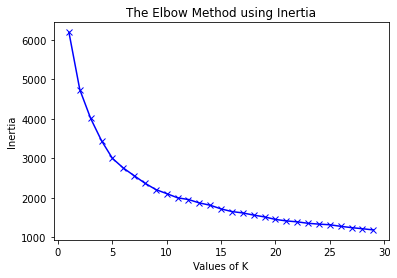

In [187]:
plt.plot(K, inercia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [188]:
kmeans = KMeans(n_clusters=7)

In [189]:
kmeans.fit(dff_scaler)

KMeans(n_clusters=7)

In [190]:
hierarquico = AgglomerativeClustering(n_clusters=7, linkage="ward")

In [191]:
hierarquico.fit(dff_scaler)

AgglomerativeClustering(n_clusters=7)

In [192]:
dbscan = DBSCAN(eps=1, min_samples=100)

In [193]:
dbscan.fit(dff_scaler)

DBSCAN(eps=1, min_samples=100)

In [194]:
print(f"k-means: {silhouette_score(dff_scaler, kmeans.labels_):.3f}")
print(f"hierarquico: {silhouette_score(dff_scaler, hierarquico.labels_):.3f}")
print(f"DBSCAN: {silhouette_score(dff_scaler, dbscan.labels_):.3f}")

k-means: 0.434
hierarquico: 0.433
DBSCAN: 0.385


In [195]:
kmeans.labels_

array([0, 4, 0, ..., 2, 2, 2])

In [196]:
df_dbscan = pd.Series(data=dbscan.labels_, name="cluster_db")
df_kmeans = pd.Series(data=kmeans.labels_, name="cluster_KMeans")
df_hierarquico = pd.Series(data=hierarquico.labels_, name='cluster_hierarquico')

In [197]:
df_dbscan.value_counts()

 0    1912
-1     886
 1     642
 3     527
 4     318
 2     144
 5     133
Name: cluster_db, dtype: int64

In [198]:
df_kmeans.value_counts()

0    1932
4     745
3     593
1     488
2     436
6     205
5     163
Name: cluster_KMeans, dtype: int64

In [199]:
df_hierarquico.value_counts()

0    1918
3     731
4     592
2     435
6     357
1     328
5     201
Name: cluster_hierarquico, dtype: int64

Text(0.5, 1.0, 'k-means')

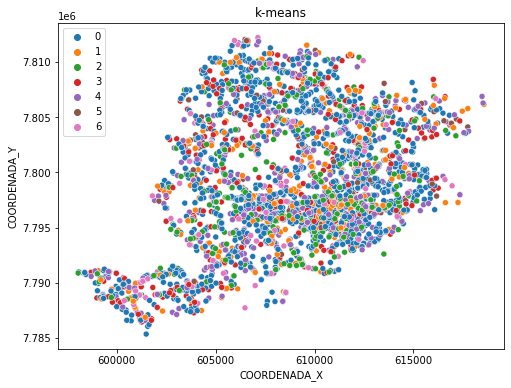

In [200]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dff, x="COORDENADA_X", y="COORDENADA_Y", hue=kmeans.labels_, palette="tab10")
plt.title("k-means")

Text(0.5, 1.0, 'Hierarquico')

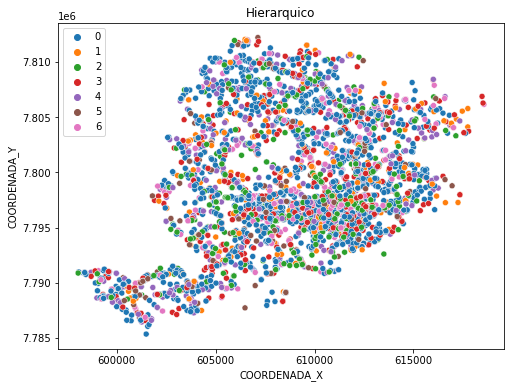

In [201]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dff, x="COORDENADA_X", y="COORDENADA_Y", hue=hierarquico.labels_, palette="tab10")
plt.title("Hierarquico")

Text(0.5, 1.0, 'DBSCAN')

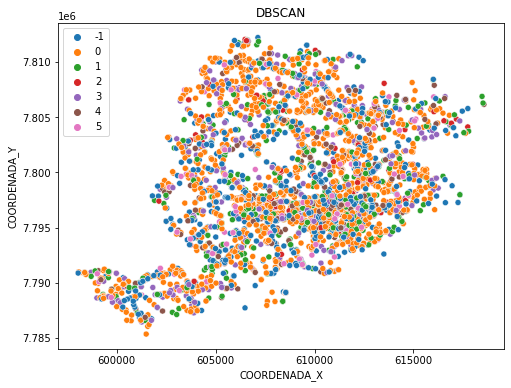

In [202]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dff, x="COORDENADA_X", y="COORDENADA_Y", hue=dbscan.labels_, palette="tab10")
plt.title("DBSCAN")

In [203]:
dff

,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,veic4,...,CHUVA,NEBLINA,NUBLADO,ASFALTO,CALCAMENTO,CONCRETO,TERRA,COMUM,FERIADO,NXT_FERIADO
0,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,608862.41,7793034.87,15,4,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4558,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4559,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4560,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [204]:
dff['KMeans'] = pd.Series(kmeans.labels_, index=dff.index)
dff['Hierarquico'] = pd.Series(hierarquico.labels_, index=dff.index)
dff['DBSCAN'] = pd.Series(dbscan.labels_, index=dff.index)

In [205]:
dfbkup['KMeans'] = pd.Series(kmeans.labels_, index=dfbkup.index)
dfbkup['Hierarquico'] = pd.Series(hierarquico.labels_, index=dfbkup.index)
dfbkup['DBSCAN'] = pd.Series(dbscan.labels_, index=dfbkup.index)

In [206]:
dffinal['KMeans'] = pd.Series(kmeans.labels_, index=dfbkup.index)
dffinal['Hierarquico'] = pd.Series(hierarquico.labels_, index=dfbkup.index)
dffinal['DBSCAN'] = pd.Series(dbscan.labels_, index=dfbkup.index)

In [207]:
dff

,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,veic4,...,ASFALTO,CALCAMENTO,CONCRETO,TERRA,COMUM,FERIADO,NXT_FERIADO,KMeans,Hierarquico,DBSCAN
0,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0
1,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4,3,-1
2,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0
3,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3,4,-1
4,608862.41,7793034.87,15,4,0.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1
4558,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1
4559,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1
4560,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1


In [208]:
dfbkup

,NUMERO_BOLETIM,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,...,ASFALTO,CALCAMENTO,CONCRETO,TERRA,COMUM,FERIADO,NXT_FERIADO,KMeans,Hierarquico,DBSCAN
0,2021-000003738-001,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0
1,2021-000013248-002,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4,3,-1
2,2021-000014597-001,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0
3,2021-000026591-001,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3,4,-1
4,2021-000063273-001,608862.41,7793034.87,15,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,2021-062470995-001,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1
4558,2021-062477432-001,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1
4559,2021-062496260-001,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1
4560,2021-062498503-001,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1


In [209]:
# C:\Users\yasser.tauil\Desktop\mineracao_dados
#read_file = dfbkup
#read_file.to_excel(r'C:\Users\Pichau\OneDrive\Área de Trabalho\Facul\Mineração de dados\dfcluster.xlsx', index = None, header=True)

In [210]:
dfbkup

,NUMERO_BOLETIM,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,veic1,veic2,veic3,...,ASFALTO,CALCAMENTO,CONCRETO,TERRA,COMUM,FERIADO,NXT_FERIADO,KMeans,Hierarquico,DBSCAN
0,2021-000003738-001,609287.10,7810943.61,0,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0
1,2021-000013248-002,609349.47,7791909.99,0,4,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4,3,-1
2,2021-000014597-001,613816.81,7805443.87,2,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0
3,2021-000026591-001,608550.21,7789129.68,7,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3,4,-1
4,2021-000063273-001,608862.41,7793034.87,15,4,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,2021-062470995-001,605027.20,7797323.03,7,4,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1
4558,2021-062477432-001,610294.94,7799833.76,9,4,0.0,2.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1
4559,2021-062496260-001,605835.52,7798623.87,12,4,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1
4560,2021-062498503-001,608951.38,7792720.26,12,4,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,-1


In [211]:
# ANALISANDO CLUSTERS 
df1 = df1[df1['COORDENADA_X'] != 0.00]

In [212]:
dfKM0 = dffinal[dffinal['KMeans'] == 0]
dfKM1 = dffinal[dffinal['KMeans'] == 1]
dfKM2 = dffinal[dffinal['KMeans'] == 2]
dfKM3 = dffinal[dffinal['KMeans'] == 3]
dfKM4 = dffinal[dffinal['KMeans'] == 4]
dfKM5 = dffinal[dffinal['KMeans'] == 5]
dfKM6 = dffinal[dffinal['KMeans'] == 6]
#dfKM7 = dffinal[dffinal['KMeans'] == 7]
#dfKM8 = dffinal[dffinal['KMeans'] == 8]
#dfKM9 = dffinal[dffinal['KMeans'] == 9]

In [213]:
dfKM0.DESC_TIPO_ACIDENTE.value_counts()

ABALROAMENTOCOMVITIMA    1932
Name: DESC_TIPO_ACIDENTE, dtype: int64

In [214]:
dfKM1.DESC_TIPO_ACIDENTE.value_counts()

ATROPELAMENTODEPESSOASEMVITIMAFATAL    362
QUEDADEPESSOADEVEICULO                  65
OUTROSCOMVITIMA                         28
ATROPELAMENTODEPESSOACOMVITIMAFATAL     18
ATROPELAMENTODEANIMALCOMVITIMA          12
QUEDADEVEICULOCOMVITIMA                  3
Name: DESC_TIPO_ACIDENTE, dtype: int64

In [215]:
dfKM2.DESC_TIPO_ACIDENTE.value_counts()

ABALROAMENTOCOMVITIMA                  164
CHOQUEMECANICOCOMVITIMA                100
COLISAODEVEICULOSCOMVITIMA              63
CAPOTAMENTO/TOMBAMENTOCOMVITIMA         51
ATROPELAMENTODEPESSOASEMVITIMAFATAL     34
QUEDADEPESSOADEVEICULO                  11
ATROPELAMENTODEPESSOACOMVITIMAFATAL      6
OUTROSCOMVITIMA                          5
QUEDADEVEICULOCOMVITIMA                  2
Name: DESC_TIPO_ACIDENTE, dtype: int64

In [216]:
dfKM3.DESC_TIPO_ACIDENTE.value_counts()

COLISAODEVEICULOSCOMVITIMA    593
Name: DESC_TIPO_ACIDENTE, dtype: int64

In [217]:
dfKM4.DESC_TIPO_ACIDENTE.value_counts()

CHOQUEMECANICOCOMVITIMA    745
Name: DESC_TIPO_ACIDENTE, dtype: int64

In [218]:
dfKM5.DESC_TIPO_ACIDENTE.value_counts()

CAPOTAMENTO/TOMBAMENTOCOMVITIMA    163
Name: DESC_TIPO_ACIDENTE, dtype: int64

In [219]:
dfKM6.DESC_TIPO_ACIDENTE.value_counts()

ABALROAMENTOCOMVITIMA                  99
COLISAODEVEICULOSCOMVITIMA             35
CHOQUEMECANICOCOMVITIMA                28
ATROPELAMENTODEPESSOASEMVITIMAFATAL    17
CAPOTAMENTO/TOMBAMENTOCOMVITIMA        15
QUEDADEPESSOADEVEICULO                  5
ATROPELAMENTODEPESSOACOMVITIMAFATAL     4
QUEDADEVEICULOCOMVITIMA                 1
OUTROSCOMVITIMA                         1
Name: DESC_TIPO_ACIDENTE, dtype: int64

In [220]:
dfKM7.DESC_TIPO_ACIDENTE.value_counts()

Series([], Name: DESC_TIPO_ACIDENTE, dtype: int64)

Text(0.5, 1.0, 'k-means')

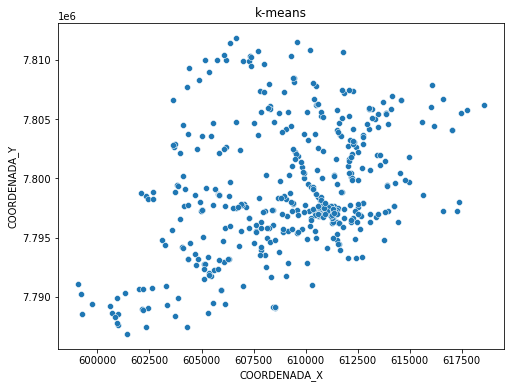

In [231]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfKM1, x="COORDENADA_X", y="COORDENADA_Y")
plt.title("k-means")

Text(0.5, 1.0, 'k-means')

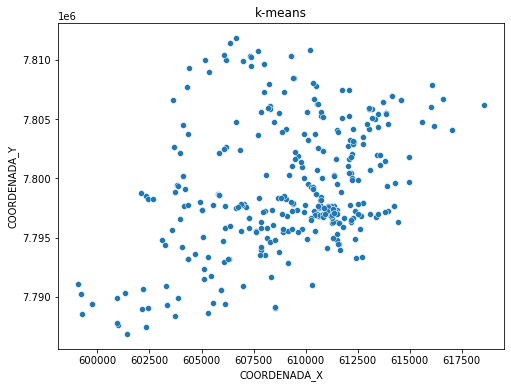

In [232]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfKM1[dfKM1['DESC_TIPO_ACIDENTE'] == 'ATROPELAMENTODEPESSOASEMVITIMAFATAL'], x="COORDENADA_X", y="COORDENADA_Y")
plt.title("k-means")

In [222]:
dfKM1.DESC_TIPO_ACIDENTE.value_counts()

ATROPELAMENTODEPESSOASEMVITIMAFATAL    362
QUEDADEPESSOADEVEICULO                  65
OUTROSCOMVITIMA                         28
ATROPELAMENTODEPESSOACOMVITIMAFATAL     18
ATROPELAMENTODEANIMALCOMVITIMA          12
QUEDADEVEICULOCOMVITIMA                  3
Name: DESC_TIPO_ACIDENTE, dtype: int64

In [223]:
dfKM1

,NUMERO_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,...,veic4,veic5,Feriado,MORTOS,FERIDOS,SEMFERIMENTOS,Embreagues,KMeans,Hierarquico,DBSCAN
19,2021-000286437-001,OUTROSCOMVITIMA,BOM,ASFALTO,613091.37,7796361.92,12,0,0.0,2.0,...,1.0,0.0,COMUM,0.0,1.0,1.0,0,1,1,-1
21,2021-000325358-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,616049.97,7807892.32,17,0,0.0,1.0,...,0.0,0.0,COMUM,0.0,1.0,1.0,1,1,6,4
35,2021-000488504-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,613425.64,7801976.37,17,3,0.0,1.0,...,0.0,0.0,NXT_FERIADO,0.0,1.0,1.0,0,1,6,4
36,2021-000504511-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,612045.62,7802719.09,17,3,0.0,1.0,...,0.0,0.0,NXT_FERIADO,0.0,1.0,1.0,0,1,6,-1
42,2021-000585498-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,606337.73,7793230.31,9,5,1.0,0.0,...,0.0,0.0,FERIADO,0.0,1.0,1.0,0,1,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,2021-061716794-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,608811.53,7798350.76,17,6,0.0,1.0,...,0.0,0.0,NXT_FERIADO,0.0,3.0,0.0,0,1,6,-1
4515,2021-061884580-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,611355.44,7797046.30,17,0,0.0,1.0,...,0.0,0.0,COMUM,0.0,1.0,1.0,0,1,6,4
4517,2021-061895417-001,QUEDADEPESSOADEVEICULO,BOM,ASFALTO,609858.11,7800540.31,17,0,0.0,1.0,...,0.0,0.0,COMUM,0.0,1.0,1.0,0,1,1,-1
4536,2021-062166719-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,616013.29,7806055.62,10,2,1.0,0.0,...,0.0,0.0,COMUM,0.0,1.0,1.0,0,1,6,4


In [224]:
pd.crosstab(dfKM0['DESC_TIPO_ACIDENTE'], dfKM0['Feriado'], normalize=True)

Feriado,COMUM,FERIADO,NXT_FERIADO
DESC_TIPO_ACIDENTE,,,
ABALROAMENTOCOMVITIMA,0.864389,0.057453,0.078157


In [225]:
pd.crosstab(dfKM1['DESC_TIPO_ACIDENTE'], dfKM1['Feriado'])

Feriado,COMUM,FERIADO,NXT_FERIADO
DESC_TIPO_ACIDENTE,,,
ATROPELAMENTODEANIMALCOMVITIMA,8,1,3
ATROPELAMENTODEPESSOACOMVITIMAFATAL,17,1,0
ATROPELAMENTODEPESSOASEMVITIMAFATAL,312,18,32
OUTROSCOMVITIMA,25,1,2
QUEDADEPESSOADEVEICULO,61,3,1
QUEDADEVEICULOCOMVITIMA,2,0,1


In [226]:
pd.crosstab(dfKM2['DESC_TIPO_ACIDENTE'], dfKM2['Feriado'], normalize=True)

Feriado,COMUM,FERIADO,NXT_FERIADO
DESC_TIPO_ACIDENTE,,,
ABALROAMENTOCOMVITIMA,0.300459,0.018349,0.057339
ATROPELAMENTODEPESSOACOMVITIMAFATAL,0.011468,0.002294,0.000000
ATROPELAMENTODEPESSOASEMVITIMAFATAL,0.066514,0.004587,0.006881
CAPOTAMENTO/TOMBAMENTOCOMVITIMA,0.105505,0.002294,0.009174
CHOQUEMECANICOCOMVITIMA,0.185780,0.009174,0.034404
COLISAODEVEICULOSCOMVITIMA,0.112385,0.009174,0.022936
OUTROSCOMVITIMA,0.006881,0.002294,0.002294
QUEDADEPESSOADEVEICULO,0.018349,0.002294,0.004587
QUEDADEVEICULOCOMVITIMA,0.000000,0.004587,0.000000


In [227]:
pd.crosstab(dfKM3['DESC_TIPO_ACIDENTE'], dfKM3['Feriado'], normalize=True)

Feriado,COMUM,FERIADO,NXT_FERIADO
DESC_TIPO_ACIDENTE,,,
COLISAODEVEICULOSCOMVITIMA,0.86172,0.052277,0.086003


In [228]:
dfKM1

,NUMERO_BOLETIM,DESC_TIPO_ACIDENTE,DESC_TEMPO,PAVIMENTO,COORDENADA_X,COORDENADA_Y,HORA,d_sem,F_cond,M_cond,...,veic4,veic5,Feriado,MORTOS,FERIDOS,SEMFERIMENTOS,Embreagues,KMeans,Hierarquico,DBSCAN
19,2021-000286437-001,OUTROSCOMVITIMA,BOM,ASFALTO,613091.37,7796361.92,12,0,0.0,2.0,...,1.0,0.0,COMUM,0.0,1.0,1.0,0,1,1,-1
21,2021-000325358-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,616049.97,7807892.32,17,0,0.0,1.0,...,0.0,0.0,COMUM,0.0,1.0,1.0,1,1,6,4
35,2021-000488504-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,613425.64,7801976.37,17,3,0.0,1.0,...,0.0,0.0,NXT_FERIADO,0.0,1.0,1.0,0,1,6,4
36,2021-000504511-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,612045.62,7802719.09,17,3,0.0,1.0,...,0.0,0.0,NXT_FERIADO,0.0,1.0,1.0,0,1,6,-1
42,2021-000585498-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,606337.73,7793230.31,9,5,1.0,0.0,...,0.0,0.0,FERIADO,0.0,1.0,1.0,0,1,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,2021-061716794-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,608811.53,7798350.76,17,6,0.0,1.0,...,0.0,0.0,NXT_FERIADO,0.0,3.0,0.0,0,1,6,-1
4515,2021-061884580-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,611355.44,7797046.30,17,0,0.0,1.0,...,0.0,0.0,COMUM,0.0,1.0,1.0,0,1,6,4
4517,2021-061895417-001,QUEDADEPESSOADEVEICULO,BOM,ASFALTO,609858.11,7800540.31,17,0,0.0,1.0,...,0.0,0.0,COMUM,0.0,1.0,1.0,0,1,1,-1
4536,2021-062166719-001,ATROPELAMENTODEPESSOASEMVITIMAFATAL,BOM,ASFALTO,616013.29,7806055.62,10,2,1.0,0.0,...,0.0,0.0,COMUM,0.0,1.0,1.0,0,1,6,4
